## Model T'as Peur

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import statsmodels.api as sm

### Importing data

In [3]:
df = pd.read_csv('../data_files/France_Energy_1965_2021.csv', index_col=0)
df.head()

,Coal,All_Fossil,Gas,GDP_per_cap,Life_exp,Other_renew,Solar,Wind,Hydro,Oil,Nuclear,Pop,Urban,Rural,All_renew
1965,481.13544,1168.4838,50.046993,13855.951,71.1034,0.000,NaN,NaN,46.881092,637.30140,52.840233,48168800,33054437,16228319,46.881092
1966,445.81410,1181.7335,52.796500,14475.218,71.5098,0.390,NaN,NaN,52.208470,683.12300,81.308180,48683090,33987676,15829365,52.598470
1967,440.04257,1285.1718,60.339252,15079.873,71.4927,0.605,NaN,NaN,45.377660,784.79000,119.774560,49181404,34910161,15423851,45.982660
1968,423.16086,1345.7490,72.156494,15609.670,71.4792,0.926,NaN,NaN,50.422610,850.43164,176.318530,49647270,35692859,15124161,51.348610
1969,423.60306,1490.1211,83.850494,16579.016,71.2021,1.067,NaN,NaN,52.942090,982.66754,203.945980,50087056,36223125,15049558,54.009090


### Data Viz

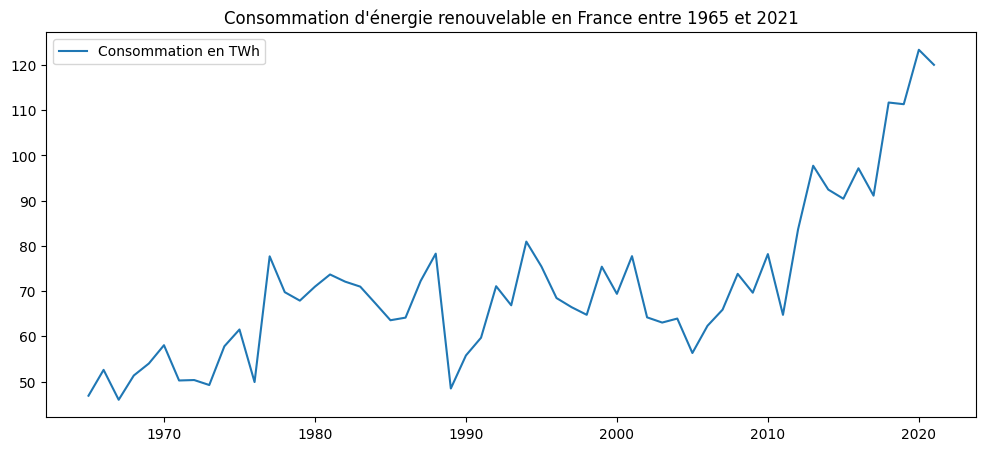

In [4]:
plt.figure(figsize=(12,5))
plt.title('Consommation d\'énergie renouvelable en France entre 1965 et 2021')
plt.plot(df['All_renew'], label='Consommation en TWh')
plt.legend(loc='best')
plt.show()

Modèle à plusieurs variables de tendance linéaire? 

Notre modèle est linéaire, et donc, suit la forme suivante: 

$$ All\_renew = \alpha + \beta_1 * Hydro + \beta_2 * All\_Fossil + \beta_3 * Pop + \beta_4 * GDP\_per\_cap + \beta_5 * Life\_exp + \beta_6 * Nuclear + \beta_7 * Solar + \beta_8 * Urban + \beta_9 Rural + \beta_10 * Wind + \beta_11 * Other\_renew  + \varepsilon $$


### Model Training 

In [6]:
model = sm.OLS.from_formula('All_renew ~ Hydro + All_Fossil + Pop + Nuclear + GDP_per_cap + Life_exp + Nuclear + Solar + Urban + Rural + Other_renew ', data=df)
results = model.fit()

In [7]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              All_renew   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     624.9
Date:                Fri, 12 Jan 2024   Prob (F-statistic):           1.19e-23
Time:                        13:27:04   Log-Likelihood:                -47.095
No. Observations:                  32   AIC:                             116.2
Df Residuals:                      21   BIC:                             132.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     426.6068    165.396      2.579      0.017      82.646     770.567
Hydro           1.0081      0.037     27.073      0.000       0.931       1.086
All_Fossil     -0.0109      0.006     -1.802      0.086      -0.023       0.002
Pop          1.137e-07   3.51e-06      0.032      0.974   -7.19e-06    7.41e-06
Nuclear        -0.0007      0.000     -1.816      0.084      -0.002       0.000
GDP_per_cap  1.808e-05      0.000      0.061      0.952      -0.001       0.001
Life_exp       -2.0025      1.724     -1.162      0.258      -5.587       1.582
Solar           1.2357      0.568      2.177      0.041       0.055       2.416
Urban        2.708e-07   2.82e-06      0.096      0.924    -5.6e-06    6.14e-06
Rural       -1.731e-05   9.66e-06     -1.793      0.087   -3.74e-05    2.77e-06
Other_renew     0.4715      1.472      0.320      0.752      -2.591       3.534
==============================================================================
Omnibus:                        5.669   Durbin-Watson:                   1.594
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                5.624
Skew:                           0.341   Prob(JB):                       0.0601
Kurtosis:                       4.937   Cond. No.                     5.71e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""